# Test de l'opérateur ProblemDiscontinuEnergieTemperature

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

In [3]:
n_lim = 100
t_fin_lim = 1.0

In [8]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
from copy import deepcopy
phy_prop_ref = deepcopy(phy_prop)
phy_prop_ref.v = 0.

num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="quick", time_scheme="euler", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

init_pbs = {'markers': markers, 'phy_prop': phy_prop, 'num_prop': num_prop}
init_pb_ref = {'markers': markers, 'phy_prop': phy_prop_ref, 'num_prop': num_prop}

dt fourier
6.918433404737903e-06
Db / dx = 30

Energie température 
dE*/dt* = 0.000135967
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dE*/dt* ref = -7.79356e-06


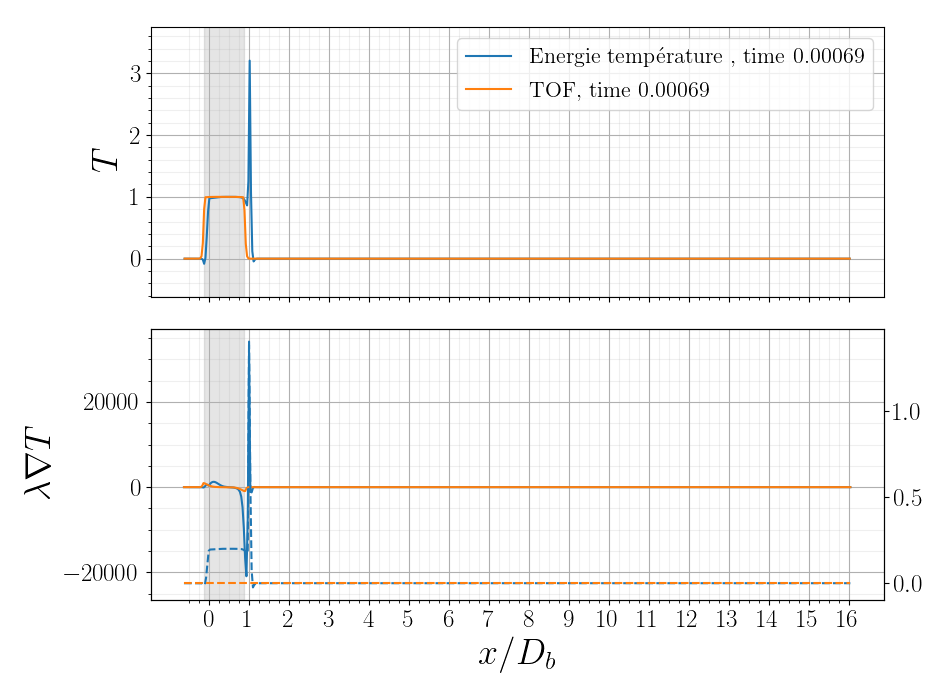

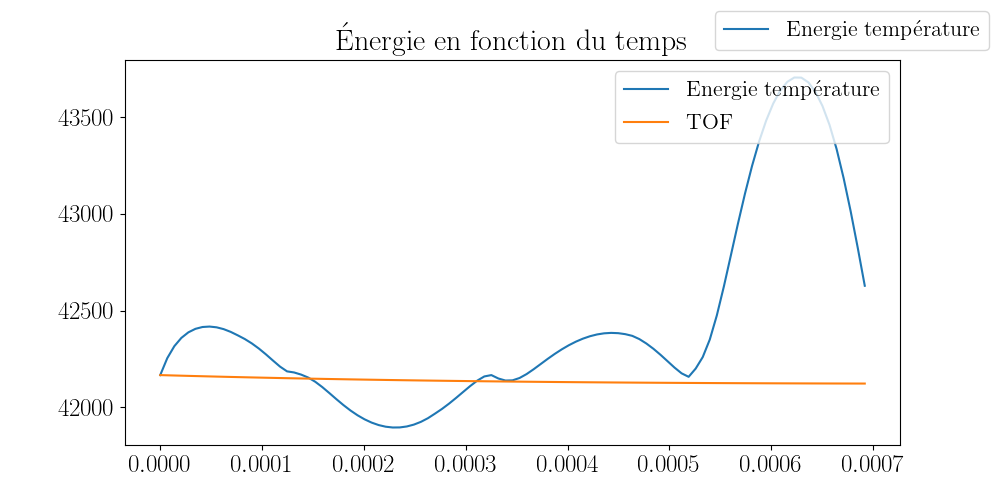

In [6]:
t_fin = 0.2
prob = ProblemDiscontinuEnergieTemperature(
    get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
)
E0 = prob.energy
# print(prob.name)
print("==========================")
plot = Plotter("classic", flux_conv=True, lda_gradT=True)
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

prob_ref = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop
)
E1 = prob_ref.energy
# print(prob_ref.name)
print("==========================")
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
le = ax1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* ref = %g" % dedt_adim)